In [56]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.rcParams.update({'figure.max_open_warning': 0})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

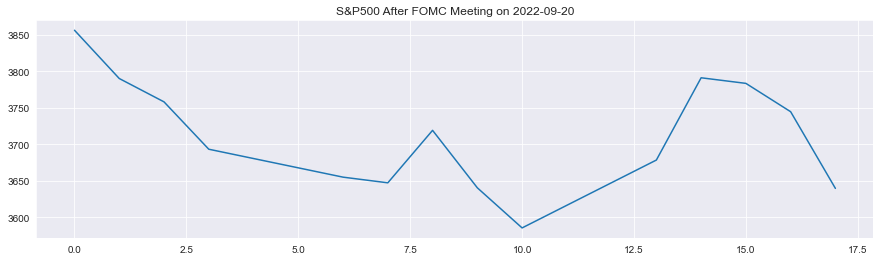

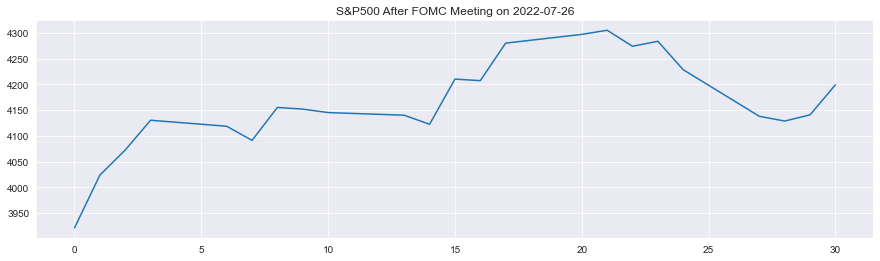

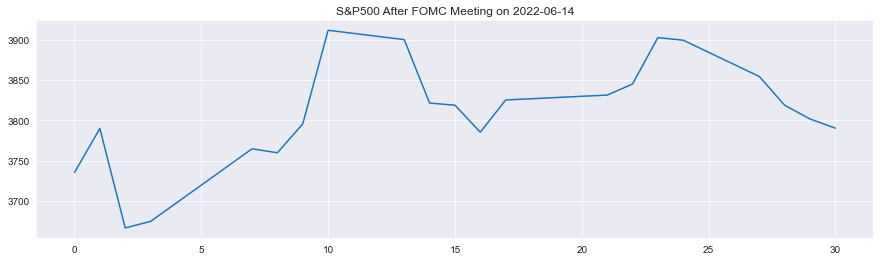

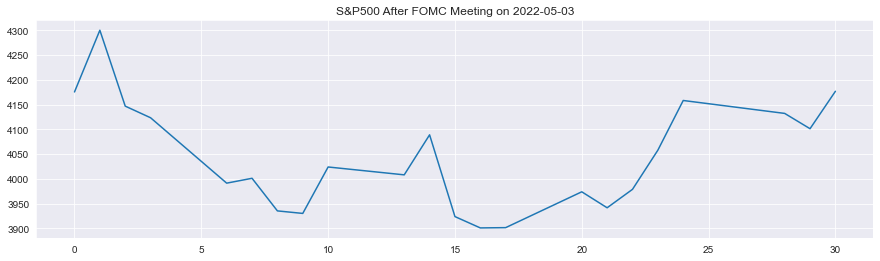

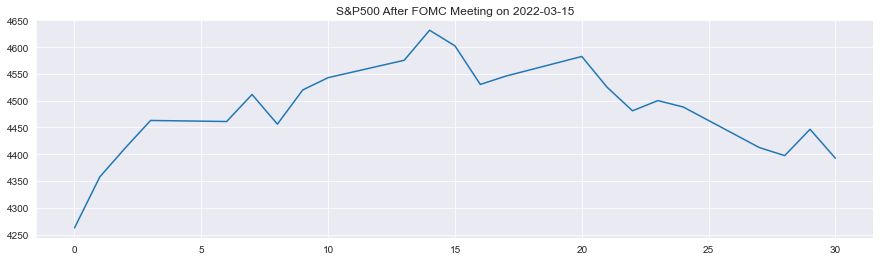

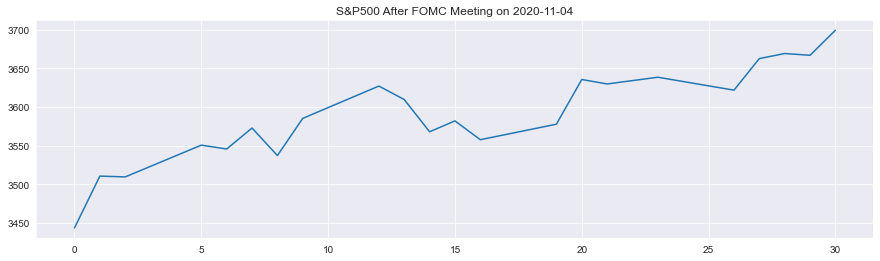

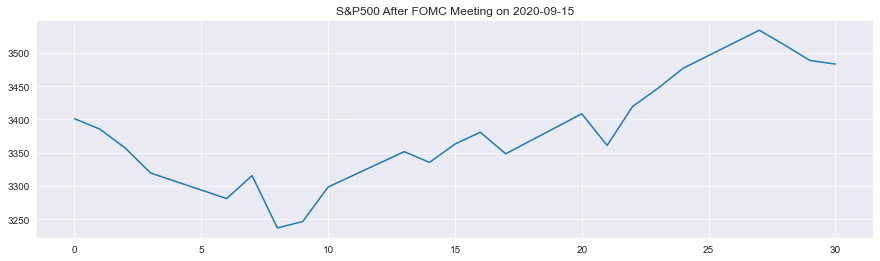

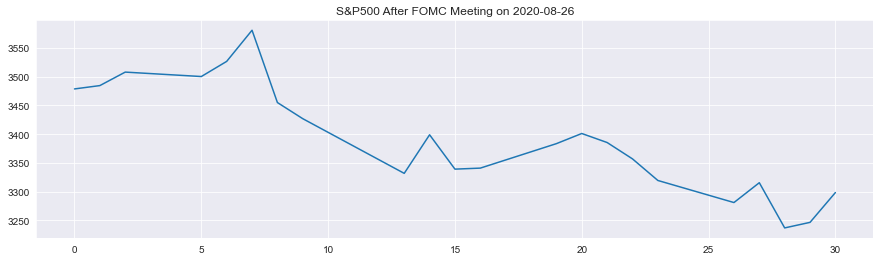

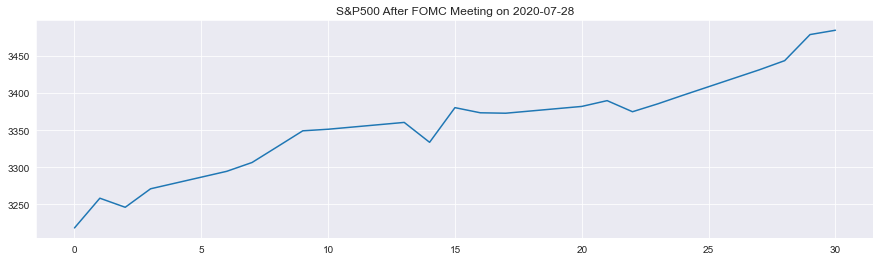

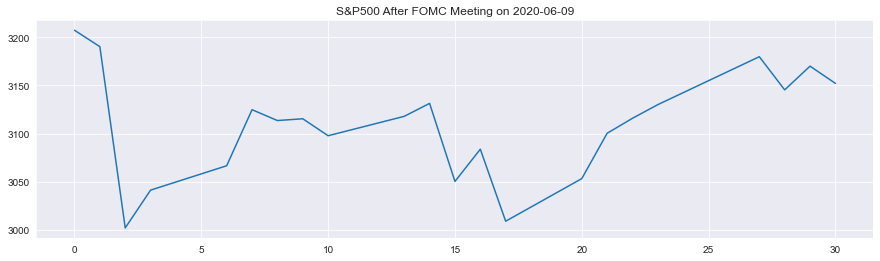

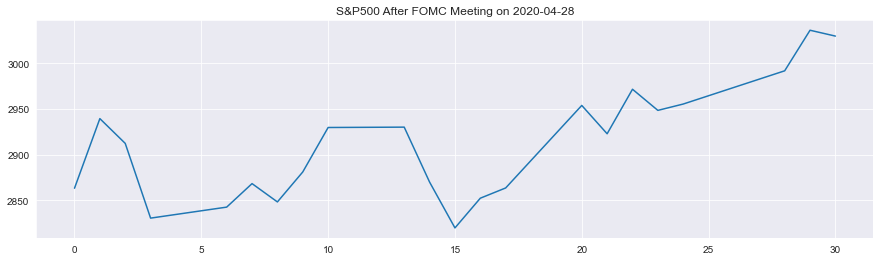

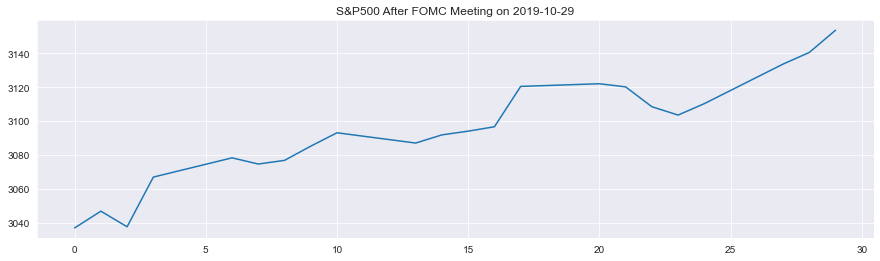

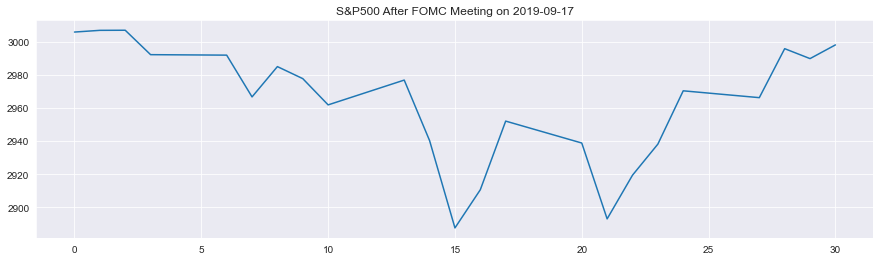

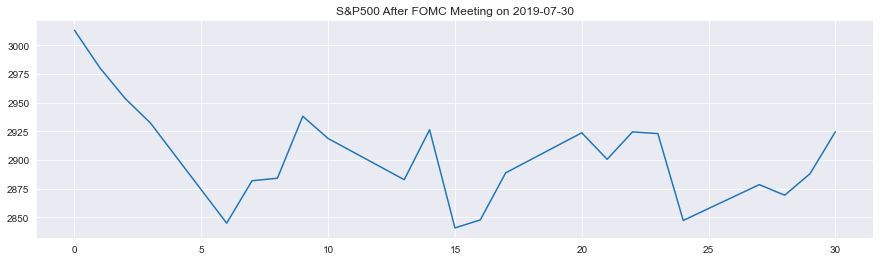

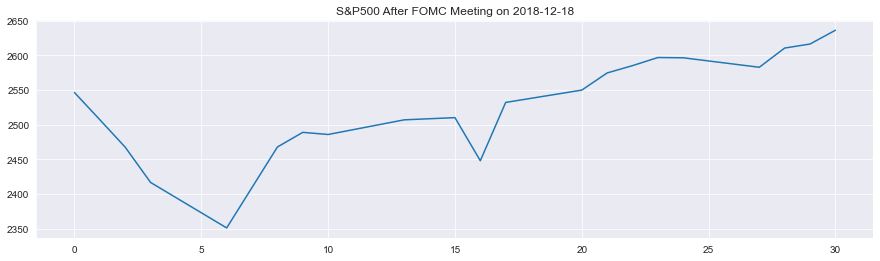

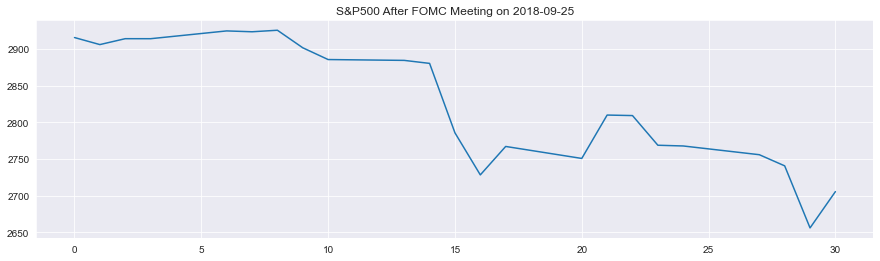

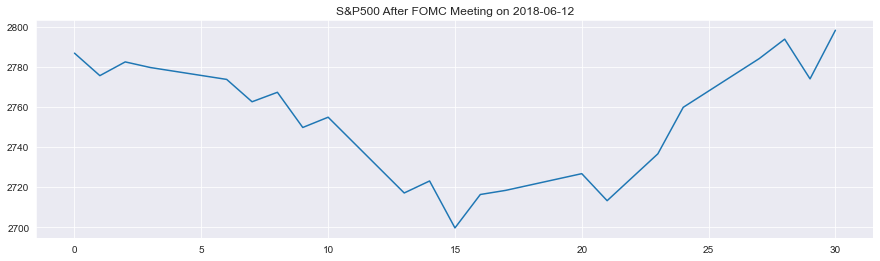

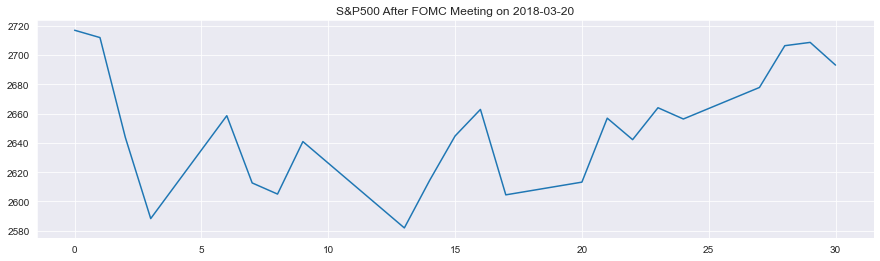

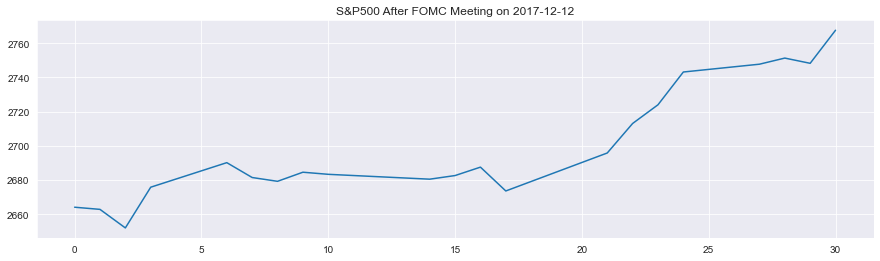

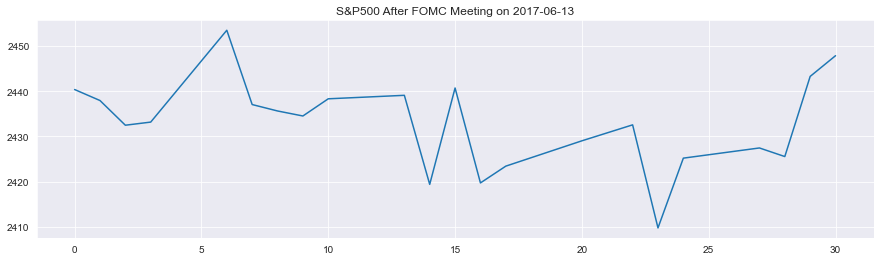

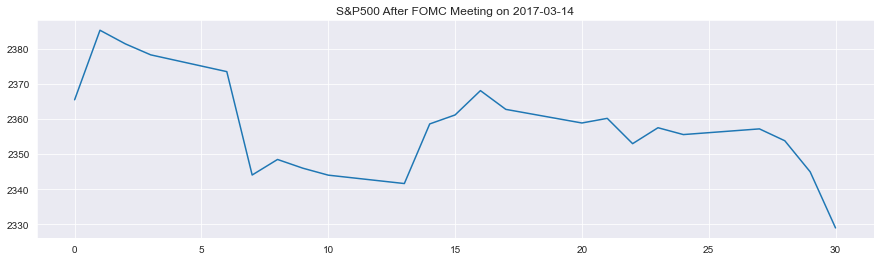

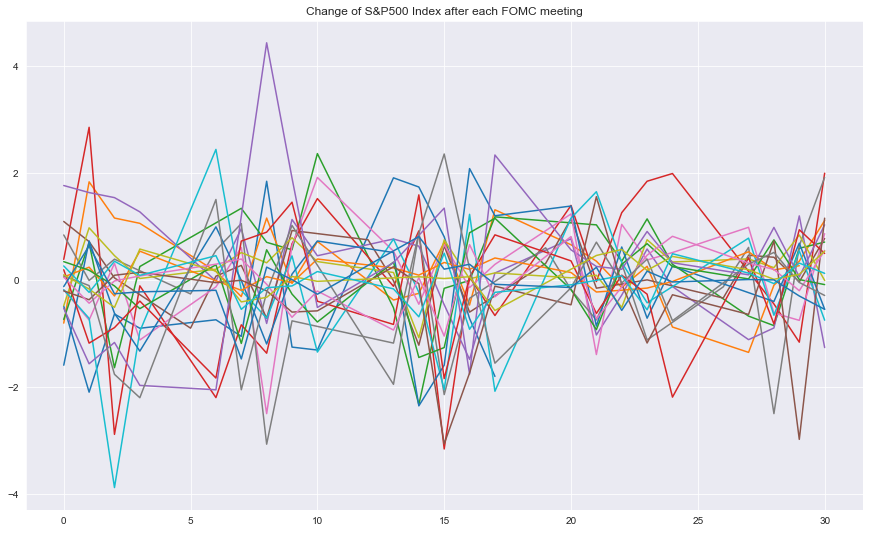

In [58]:
## List of FOMC dates

start_date = [
    "2022-09-21", "2022-07-27", "2022-06-15", "2022-05-04", "2022-03-16", 
    "2020-11-05", "2020-09-16", "2020-08-27", "2020-07-29", "2020-06-10", "2020-04-29",
    "2019-10-30", "2019-09-18", "2019-07-31", 
    "2018-12-19", "2018-09-26", "2018-06-13", "2018-03-21",
    "2017-12-13", "2017-06-14", "2017-03-15"
    ]
end_date = []

for i in range(len(start_date)): ## Generate End dates for each FOMC meeting term
    start_date[i] = datetime.strptime(start_date[i], "%Y-%m-%d") - timedelta(days = 1)
    end_date.append(start_date[i] + timedelta(days = 31))
    start_date[i] = datetime.strftime(start_date[i], "%Y-%m-%d")
    end_date[i] = datetime.strftime(end_date[i], "%Y-%m-%d")

def collectData(ticker): ## Plot 30 days movement of ticker after FOMC dates. Last plot combines every dates.
    plt.figure(len(start_date), figsize = (15, 9))
    plt.title("Change of {} after each FOMC meeting".format(ticker))
    for i in range(len(start_date)):
        data = pdr.get_data_yahoo(ticker, start=start_date[i], end=end_date[i])
        x = data.index
        shift = datetime.strptime(start_date[i], "%Y-%m-%d")
        shift = shift.replace(tzinfo = timezone.utc)
        yPercent = 100 *(data['Close'] - data['Open']) / data['Open']
        y = data['Close']
        x = (x - shift).days
        plt.figure(i, figsize = (15, 4))
        plt.plot(x, y)
        plt.title("S&P500 After FOMC Meeting on {}".format(start_date[i]))
        plt.figure(len(start_date))
        plt.plot(x, yPercent)

collectData('^GSPC') ## Ticker for S&P500


In [2]:
import csv

tickerList = []

with open('TickerList.csv') as f:
    reader = csv.reader(f)
    tickerList = list(reader)

print(tickerList)
    
for ticker in tickerList:
    collectData(ticker)

[['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'AAP', 'AES', 'AFL', 'A', 'APD', 'ALK', 'ALB', 'ARE', 'ALLE', 'ALL', 'MO', 'AMCR', 'AEE', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'APH', 'AON', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'AZO', 'AVB', 'AVY', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'BLK', 'BK', 'BA', 'BWA', 'BXP', 'BSX', 'BMY', 'BR', 'BRO', 'BF.B', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBRE', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'C', 'CFG', 'CLX', 'CMS', 'KO', 'CL', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'CTVA', 'CTRA', 'CCI', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'DVN', 'DLR', 'DFS', 'DIS', 'DG', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'ECL', 'EIX', 'EW', 'ELV', 'LLY', 'EMR', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQR', 'ESS', 'EL', 'RE', 'EVRG', 'ES', 'EXR', 'XOM', 'FDS', 'FRT', 'FDX', 'FRC', 'FE', 'FIS', 'FLT', 'FMC'